In [1]:
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
train = pd.read_csv('C:/Users/Admin1/Desktop/ds/hack/Participants_Data_melanoma/Train.csv')
test = pd.read_csv('C:/Users/Admin1/Desktop/ds/hack/Participants_Data_melanoma/Test.csv')
sub = pd.read_csv('C:/Users/Admin1/Desktop/ds/hack/Participants_Data_melanoma/sample_submission.csv')

In [3]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [82]:
train.shape

(9146, 10)

In [4]:
train.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [5]:
test.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
mass_npea         9146 non-null float64
size_npear        9146 non-null float64
malign_ratio      9146 non-null float64
damage_size       9146 non-null float64
exposed_area      9146 non-null float64
std_dev_malign    9146 non-null float64
err_malign        9146 non-null float64
malign_penalty    9146 non-null int64
damage_ratio      9146 non-null float64
tumor_size        9146 non-null float64
dtypes: float64(9), int64(1)
memory usage: 714.6 KB


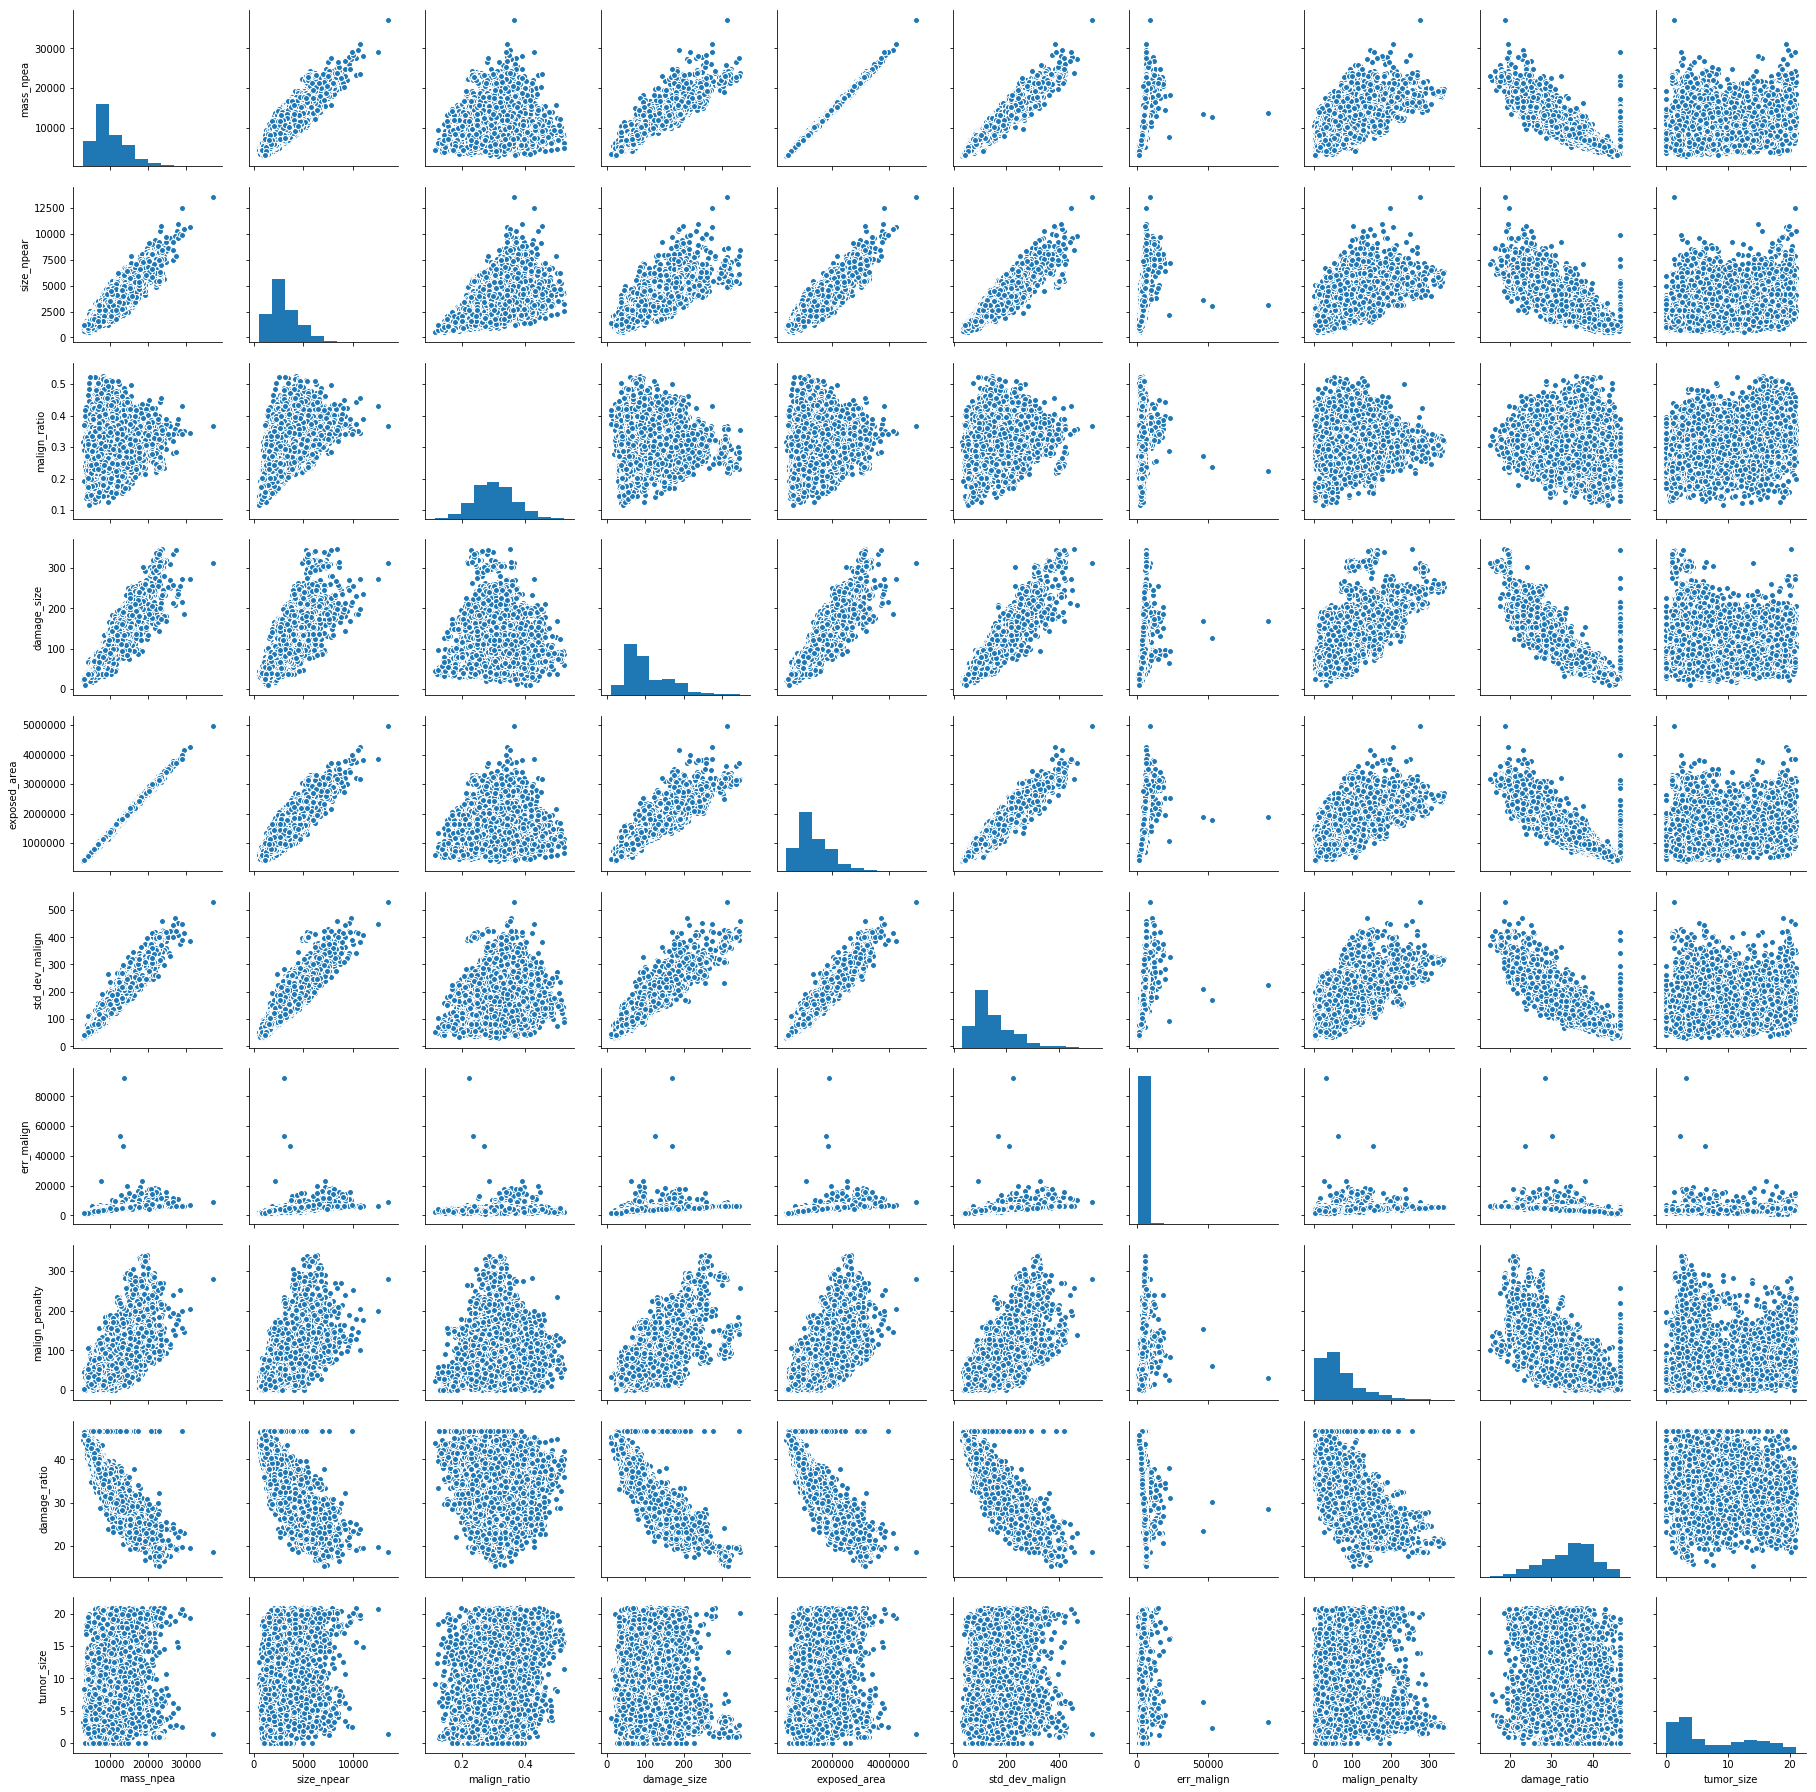

In [34]:
sns.pairplot(train)

In [35]:
train.corr()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
mass_npea,1.000000,0.907335,0.123411,0.930691,0.998167,0.968006,0.617207,0.654849,-0.901106,-0.004679
size_npear,0.907335,1.000000,0.499398,0.794096,0.903502,0.907932,0.570343,0.593019,-0.791768,0.164761
malign_ratio,0.123411,0.499398,1.000000,0.029167,0.119389,0.196430,0.081228,0.102475,-0.068605,0.374273
damage_size,0.930691,0.794096,0.029167,1.000000,0.925266,0.938202,0.535834,0.676904,-0.892006,-0.163804
exposed_area,0.998167,0.903502,0.119389,0.925266,1.000000,0.962462,0.617149,0.646444,-0.900717,-0.003641
std_dev_malign,0.968006,0.907932,0.196430,0.938202,0.962462,1.000000,0.597842,0.667264,-0.884481,-0.030085
err_malign,0.617207,0.570343,0.081228,0.535834,0.617149,0.597842,1.000000,0.381454,-0.583945,0.004484
malign_penalty,0.654849,0.593019,0.102475,0.676904,0.646444,0.667264,0.381454,1.000000,-0.646893,0.011871
damage_ratio,-0.901106,-0.791768,-0.068605,-0.892006,-0.900717,-0.884481,-0.583945,-0.646893,1.000000,0.054892
tumor_size,-0.004679,0.164761,0.374273,-0.163804,-0.003641,-0.030085,0.004484,0.011871,0.054892,1.000000


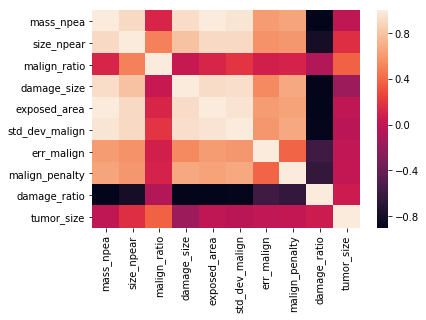

In [36]:
sns.heatmap(train.corr())

In [39]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


C:\Users\Admin1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


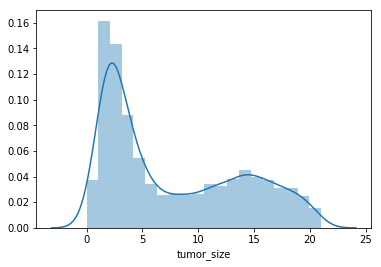

In [54]:
sns.distplot(train['tumor_size'])

In [55]:
train.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size'],
      dtype='object')

In [40]:
x = train[['size_npear', 'malign_ratio', 'damage_size',  'damage_ratio']];
y = train[['tumor_size']]

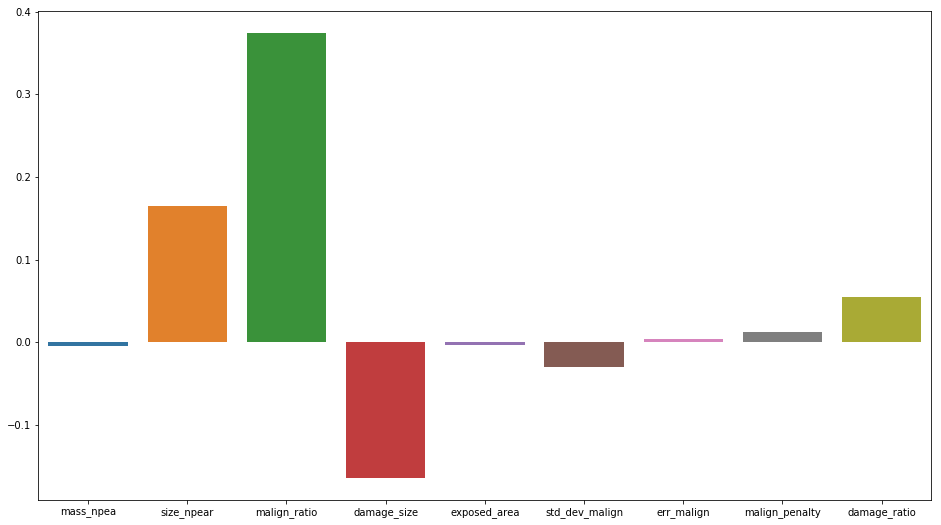

In [41]:
plt.figure(figsize = (16,9))
final_x = train.drop(['tumor_size'], axis = 1) 
sns.barplot(final_x.columns,final_x.corrwith(train['tumor_size']))

In [12]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;

In [42]:
test_1 = test[['size_npear', 'malign_ratio', 'damage_size',  'damage_ratio']]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

In [65]:
x_train.shape

(5487, 4)

In [67]:
x_test.shape

(3659, 4)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scx = StandardScaler()

In [70]:
x_train_std = scx.fit_transform(x_train)

In [71]:
x_train_std

array([[-0.90981596,  0.53919218, -1.10975135,  1.10963333],
       [ 3.14386067,  0.61068076,  1.52174739, -1.93111236],
       [ 3.45091514,  1.32909297,  1.55207146, -1.98998366],
       ...,
       [-1.25296553, -1.30973349, -1.0775832 ,  1.46887805],
       [-0.35341755,  0.82963459, -0.7745762 ,  0.37609321],
       [ 0.83324072,  2.33746674, -0.71379945,  0.7519729 ]])

In [72]:
##We will now predict the test set results and check the accuracy with each of our model:

from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [75]:
lr = LinearRegression()
lr.fit(x_train,y_train)

predictions = lr.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

4.434802228320764
27.628305507764672
5.256263454942558
0.27240147350852795


In [76]:
lr_std = LinearRegression()
lr_std.fit(x_train_std,y_train)
x_test_std = scx.transform(x_test)
predictions1 = lr_std.predict(x_test_std)
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

4.434802228320764
27.628305507764672
5.256263454942558
0.27240147350852795


In [57]:
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;

In [78]:
xx = XGBRegressor();
xx.fit(x_train_std, y_train);
xx.score(x_test_std, y_test)

0.33744872829931694

In [59]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(x_train, y_train);
lgb.score(x_test, y_test)

0.39366994007696865

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dc = DecisionTreeRegressor();
dc.fit(x_train, y_train);
dc.score(x_test, y_test)

-0.0956465015384953

In [61]:
lin = LinearRegression();
lin.fit(x_train, y_train);
lin.score(x_test, y_test)

0.27240147350852795

In [50]:
from sklearn.ensemble import RandomForestRegressor;

In [83]:
rf = RandomForestRegressor();
rf.fit(x_train, y_train);
rf.score(x_test, y_test)

C:\Users\Admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.34397331812789766

In [52]:
from sklearn.neighbors import KNeighborsRegressor;

In [63]:
knn = KNeighborsRegressor();
knn.fit(x_train, y_train);
knn.score(x_test, y_test)

0.17609274205727288

In [ ]:
1. Linear Regression — 27.2%
2. K Nearest Neighbor — 17.6%
3. LGBM  — 39.3%
4. Decision Tree Algorithm — 9.8%
5. Random Forest Classification — 34.2%
